In [2]:
import pandas as pd
import numpy as np
import re
import pickle

In [3]:
df = pd.read_pickle('df_train.pkl')

In [4]:
df.head()

,headlines
0,upGrad learner switches to career in ML & Al w...
1,Delhi techie wins free food from Swiggy for on...
2,New Zealand end Rohit Sharma-led India's 12-ma...
3,Aegon life iTerm insurance plan helps customer...
4,"Have known Hirani for yrs, what if MeToo claim..."


In [5]:
df.shape

(98401, 1)

In [6]:
df['len'] = df['headlines'].apply(len)

In [7]:
df.head()

,headlines,len
0,upGrad learner switches to career in ML & Al w...,65
1,Delhi techie wins free food from Swiggy for on...,60
2,New Zealand end Rohit Sharma-led India's 12-ma...,64
3,Aegon life iTerm insurance plan helps customer...,56
4,"Have known Hirani for yrs, what if MeToo claim...",67


In [8]:
df.describe()

,len
count,98401.000000
mean,57.427109
std,4.686854
min,9.000000
25%,56.000000
50%,58.000000
75%,60.000000
max,79.000000


In [9]:
df_test = pd.read_csv('UnFound_clustering_assignment - UnFound_clustering_assignment.csv')

In [10]:
df_test = df_test['SENTENCES']

In [11]:
df_test = pd.DataFrame(df_test)

In [12]:
df_test.head(2)

,SENTENCES
0,"Moeller's student-run newspaper, The Crusader,..."
1,"In 2008, The Crusader won First Place, the sec..."


In [13]:
df_test['len'] = df_test['SENTENCES'].apply(len)

In [14]:
df_test.describe()

,len
count,46117.000000
mean,133.134376
std,62.892892
min,7.000000
25%,85.000000
50%,123.000000
75%,172.000000
max,441.000000


In [15]:
df.describe()

,len
count,98401.000000
mean,57.427109
std,4.686854
min,9.000000
25%,56.000000
50%,58.000000
75%,60.000000
max,79.000000


In [16]:
## Our dataset is not that similar to test dataset

In [17]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English
parser = English()

In [18]:
## Tokenize the text

def tokenize(text):
    s_token = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_num:
            s_token.append('number')
        elif token.is_punct:
            s_token.append('of') ## "of" is stop words, we will remove stop words 
        else:
            s_token.append(token.lower_)
    return s_token
            
        

In [19]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

[nltk_data] Downloading package wordnet to C:\Users\Brajendra P.
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
get_lemma("best")

'best'

In [21]:
get_lemma('ran')

'run'

In [22]:
def get_lemma_1(word):
    x = [text.lemma_ for text in parser(word)]
    str1 = ""
    return str1.join(x)

In [23]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [24]:
spacy_stopwords

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'front',
 'full',
 'further',
 'get',
 'give',
 'g

In [25]:
## Text preprocessing
def prepate_text_for_model(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if token not in spacy_stopwords]
    tokens = [get_lemma_1(token) for token in tokens]
    return tokens

In [26]:
df_percent = df.sample(frac=0.14)

In [27]:
##Read the file and apply the functions
df_percent.shape

(13776, 2)

In [28]:
df_percent = df_percent['headlines']

In [29]:
df_percent.columns=["headlines"]
df_percent.to_csv("df_small.csv", index=False)

In [101]:
import random
text_data = []
with open("df_percent.csv", encoding='latin-1') as f:
    for line in f:
        tokens = prepate_text_for_model(line)
        text_data.append(tokens)


In [117]:
string_flaten = text_data[0:30]

In [118]:
string_flaten

[['uk', 'supermarket', 'recall', 'baby', 'food', 'meal', 'plastic', 'find'],
 ['anju', 'bobby', 'george', 'appeal', 'numb', 'olympics', 'medal'],
 ['bjp', 'explore', 'name', 'replace', 'shivraj', 'leader', 'mp', 'cong'],
 ['hard', 'time', 'hear', 'federer', 'old', 'numb'],
 ['big', 'b', 'support', 'mumbai', 'police', 'campaign', 'base', 'film'],
 ['ready', 'work', 'new', 'pak', 'govt', 'forward', 'tie', 'china'],
 ['fm', 'jaitley', 'term', 'rahul', 'twitter', 'bahadur', 'budget', 'row'],
 ['shun', 'hinduism', 'bjp', 'not', 'change', 'mindset', 'mayawati'],
 ['ã¢â\x82â¹436', 'crore', 'tax', 'demand', 'ndtv', 'uphold'],
 ['boy',
  'try',
  'recreate',
  'pic',
  'numb',
  'yr',
  'ago',
  'get',
  'stick',
  'hole'],
 ['half', 'india', "'s", 'fruit', 'vegetable', 'waste', 'study'],
 ['hilsa', 'fish', 'infiltrator', 'refugee', 'ask', 'wb', 'cm', 'mamata'],
 ['hc', 'slam', 'mumbai', 'cop', 'fail', 'find', 'miss', 'girl'],
 ['presence', 'syria', 'defeat', 'isis', 'end', 'civil', 'war'],
 ['

In [104]:
#pd.read_csv('df_percent.csv').iloc[8119,1]

In [105]:
#t = parser("he is earning 1000: isn't")

In [103]:
#for i in t:
#    print(i.text, i.is_digit, i.is_punct)

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [107]:
tf_v = TfidfVectorizer(stop_words=None, max_df=0.7, min_df=2, max_features=2000)

In [119]:
test_tf = [_ for i in range(len(string_flaten)) for _ in string_flaten[i]]

In [120]:
data_tf = tf_v.fit_transform(test_tf)

In [121]:
data_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
from sklearn.cluster import KMeans

In [124]:
kmeans = KMeans(n_clusters=2).fit(data_tf.toarray())

In [125]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [126]:
wcss = [] # within cluster sum of square

In [140]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0, verbose=True)
    kmeans.fit(data_tf.toarray())
    wcss.append(kmeans.inertia_)
    print('---------------->')

Initialization complete
Iteration  0, inertia 49.000
Iteration  1, inertia 48.390
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.010659e-06
Initialization complete
Iteration  0, inertia 49.000
Iteration  1, inertia 48.390
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.010659e-06
Initialization complete
Iteration  0, inertia 49.000
Iteration  1, inertia 48.390
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.010659e-06
Initialization complete
Iteration  0, inertia 273.000
Iteration  1, inertia 48.390
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.010659e-06
Initialization complete
Iteration  0, inertia 49.000
Iteration  1, inertia 48.390
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.010659e-06
Initialization complete
Iteration  0, inertia 49.000
Iteration  1, inertia 48.390
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.010659e-06
Initialization 

done sorting
end inner loop
Iteration 0, inertia 29.71291866028708
start iteration
done sorting
end inner loop
Iteration 1, inertia 29.71291866028708
center shift 0.000000e+00 within tolerance 1.010659e-06
---------------->
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 28.70673076923077
start iteration
done sorting
end inner loop
Iteration 1, inertia 28.70673076923077
center shift 0.000000e+00 within tolerance 1.010659e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 27.729468599033808
start iteration
done sorting
end inner loop
Iteration 1, inertia 27.729468599033808
center shift 0.000000e+00 within tolerance 1.010659e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 28.706730769230774
start iteration
done sorting
end inner loop
Iteration 1, inertia 28.706730769230774
center shift 0.000000e+00 within tolerance 1.010659e-06
Initialization complete
start iter

In [144]:
## Visualization of plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

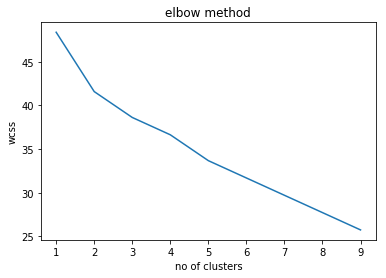

In [145]:
plt.plot(range(1,10), wcss)
plt.title("elbow method")
plt.xlabel("no of clusters")
plt.ylabel("wcss")
plt.show()